<a href="https://colab.research.google.com/github/nagio-meter/performancemon/blob/main/treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import statsmodels.formula.api as smf


In [2]:
# Cell 2: Load Dataset
data = pd.read_csv("cell_treatment_response_dataset.csv")
data.head()


,cell_type,treated,response,responded
0,C,0,0.122698,0
1,A,1,0.672904,1
2,C,0,0.144629,0
3,C,0,0.213624,0
4,A,1,0.750143,1


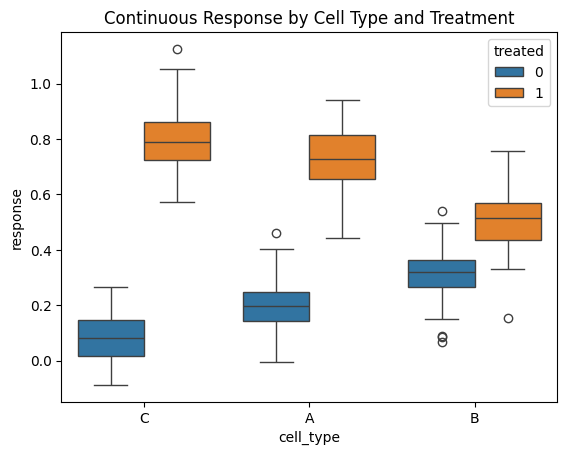

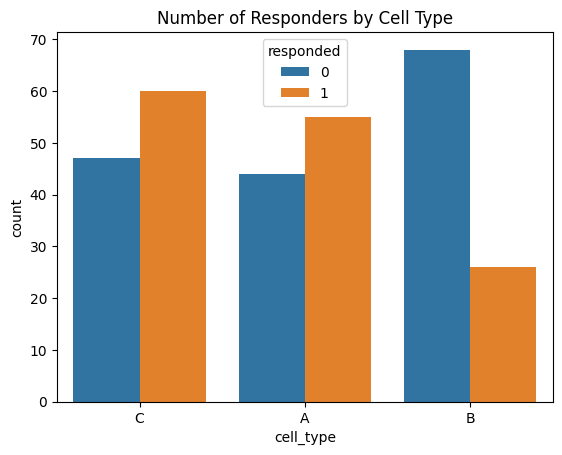

In [3]:
# Cell 3: Exploratory Data Analysis
# Plot response distribution
sns.boxplot(data=data, x='cell_type', y='response', hue='treated')
plt.title("Continuous Response by Cell Type and Treatment")
plt.show()

# Plot binary responders
sns.countplot(data=data, x='cell_type', hue='responded')
plt.title("Number of Responders by Cell Type")
plt.show()


In [4]:
# Cell 4: Preprocess for Logistic Regression
# One-hot encode cell_type and interaction terms
data_dummy = pd.get_dummies(data, columns=['cell_type'], drop_first=True)
data_dummy['treated_cell_B'] = data_dummy['treated'] * data_dummy['cell_type_B']
data_dummy['treated_cell_C'] = data_dummy['treated'] * data_dummy['cell_type_C']

X = data_dummy[['treated', 'cell_type_B', 'cell_type_C', 'treated_cell_B', 'treated_cell_C']]
y = data_dummy['responded']


In [5]:
# Cell 5: Fit Logistic Regression Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[30  6]
 [ 0 24]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91        36
           1       0.80      1.00      0.89        24

    accuracy                           0.90        60
   macro avg       0.90      0.92      0.90        60
weighted avg       0.92      0.90      0.90        60

ROC AUC Score: 0.9809027777777778


In [6]:
# Cell 6: Interpret Coefficients
coefficients = pd.Series(model.coef_[0], index=X.columns)
print("Logistic Regression Coefficients:")
print(coefficients)


Logistic Regression Coefficients:
treated           4.622936
cell_type_B      -0.907270
cell_type_C      -0.317221
treated_cell_B   -0.886845
treated_cell_C    1.641665
dtype: float64


In [7]:
# Cell 7: (Optional) Statsmodels for p-values and detailed summary
logit_model = smf.logit('responded ~ treated * cell_type', data=data).fit()
print(logit_model.summary())


         Current function value: 0.155705
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              responded   No. Observations:                  300
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            5
Date:                Tue, 27 May 2025   Pseudo R-squ.:                  0.7748
Time:                        18:27:21   Log-Likelihood:                -46.711
converged:                      False   LL-Null:                       -207.40
Covariance Type:            nonrobust   LLR p-value:                 2.521e-67
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -24.6521   3.48e+04     -0.001      0.999   -6.82e+04    6.82e+04
cell_type[T.B]            20.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
